In [8]:
# VIE over hexagonal grid
import numpy as np
from scipy.special import hankel1

In [9]:
ko = 10  # Wavenumber
rad = 1. # radius of circle
lam = 2*np.pi/ko
refInd = 1.3
n_per_lam = 5  # Pixels per wavelength

h_temp = lam / n_per_lam # temp pixel dimension

wx = 2 * rad
wy = 2 * rad

# How many points in x and y directions
M = np.int(np.ceil(wx / h_temp))

dx = wx/M;
dy = np.sqrt(3)/2*dx
N = np.int(np.ceil(wy / dy))
wy = N*dy;

A = np.sqrt(3)/2*dy**2      # pixel area
a = np.sqrt(A / np.pi) # radius of equivalent-area circle

# Get coordinates of points on grid    
x_temp = np.zeros((M*N, 1), dtype=np.complex128);
counter= 0;
for j in range(N):
    for i in range(M):
        x_temp[counter] = -wx/2 + dx/2+dx*i \
            - 1j*wy/2 + 1j * (dy/2+dy*j)
        counter=counter+1

x_coord = (np.arange(M)+1) * dx - dx/2 - wx/2;
y_coord = (np.arange(N)+1) * dy - dy/2 - wy/2;

In [10]:
x_coord

array([-0.9375, -0.8125, -0.6875, -0.5625, -0.4375, -0.3125, -0.1875,
       -0.0625,  0.0625,  0.1875,  0.3125,  0.4375,  0.5625,  0.6875,
        0.8125,  0.9375])

In [11]:
x = np.concatenate([x_temp, x_temp+dx/2+1j*dy/2]);

In [12]:
perm = np.ones(2*M*N);

In [13]:
idx = np.where(np.abs(x)<=rad)

In [14]:
perm[idx[0]] = refInd**2;  # assume permittivity of scatterer is 2 for now
Mr = perm - 1;

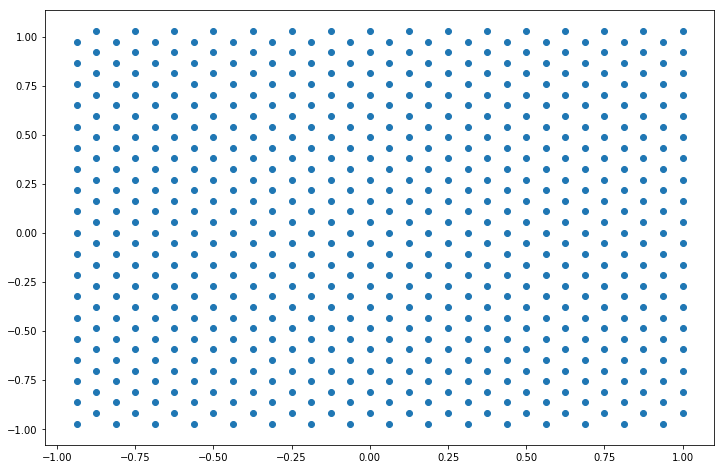

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.scatter(np.real(x), np.imag(x))

In [8]:
# Incident plane wave
dInc = np.array([1,0]);
eInc = np.zeros((2*M*N,1), dtype=np.complex128);
eInc[idx[0]] = np.exp(1j * ko * (np.real(x[idx[0]])*dInc[0] + np.imag(x[idx[0]]*dInc[1])))

In [9]:
EINC = eInc.reshape(2*M, N, order = 'F')

In [10]:
# Fundamental solution of the Helmholtz equation
g = lambda x, y : A * 1j/4 * hankel1(0, ko*np.abs(x - y));
# Self term
self = a**2*1j*np.pi/2* ((1+1j*np.euler_gamma)/2-1j/np.pi+1j/np.pi*np.log(ko*a/2));

In [11]:
G = np.zeros((2*M*N,2*M*N), dtype=np.complex128)
for i in range(2*M*N):
    for j in range(2*M*N):
        if i==j:
            G[i,j] = self;
        else:
            G[i,j] = g(x[i],x[j]);

In [12]:
Mr.shape

(608,)

In [13]:
mat = G
op = np.eye(2*M*N) - ko**2 * Mr * G
# eOut = op \ eInc(:);
eOut = np.linalg.solve(op, eInc)

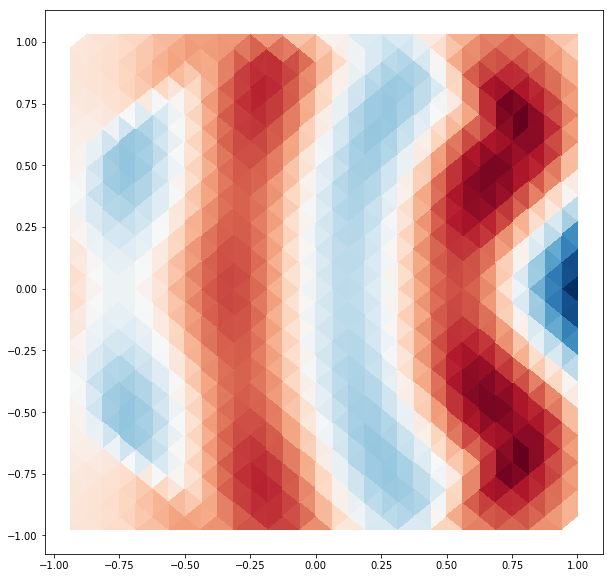

In [14]:
import numpy as np
import matplotlib.pyplot as plt
xx = (np.real(x)).reshape(2*M*N)
yy = (np.imag(x)).reshape(2*M*N)
z = eOut.reshape(2*M*N)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.tripcolor(xx,yy,np.real(z),cmap=plt.cm.get_cmap('RdBu_r'))

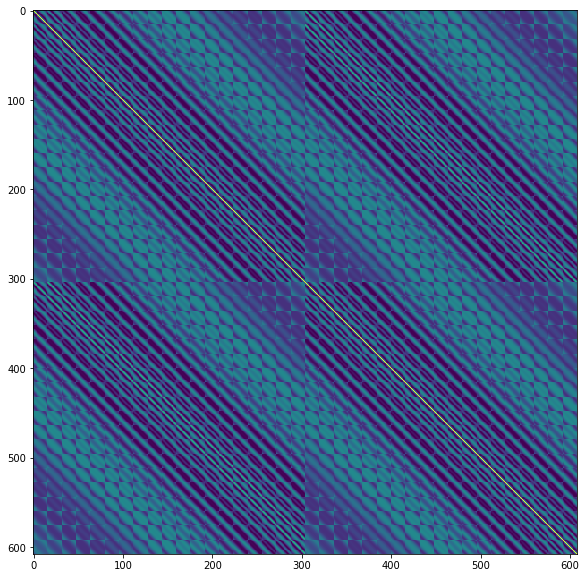

In [15]:
import numpy as np
import matplotlib.pyplot as plt
xx = (np.real(x)).reshape(2*M*N)
yy = (np.imag(x)).reshape(2*M*N)
z = eInc.reshape(2*M*N)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.imshow(np.real(G))

In [16]:
EINC = np.zeros((2*M*N,1), dtype=np.complex128);
EINC = np.exp(1j * ko * (np.real(x)*dInc[0] + np.imag(x*dInc[1])))

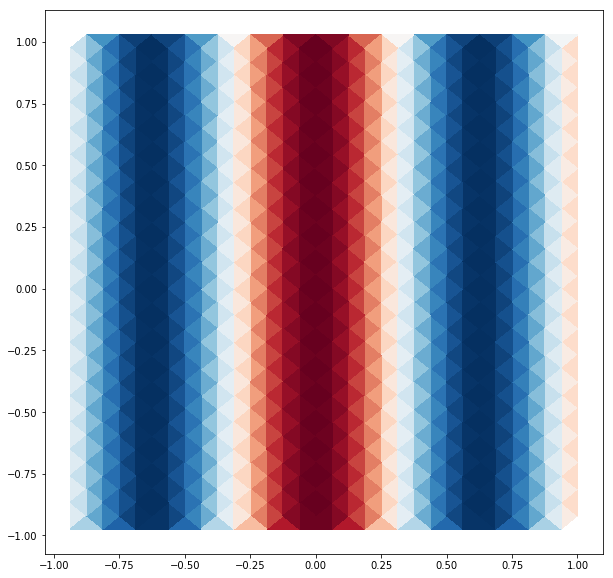

In [17]:
import numpy as np
import matplotlib.pyplot as plt
xx = (np.real(x)).reshape(2*M*N)
yy = (np.imag(x)).reshape(2*M*N)
z = EINC.reshape(2*M*N)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.tripcolor(xx,yy,np.real(z),cmap=plt.cm.get_cmap('RdBu_r'))
# ax.tricontourf(xx,yy,np.real(z), 20, cmap=plt.cm.get_cmap('RdBu_r')) # choose 20 contour levels, just to show how good its interpolation is
# ax.plot(xx,yy, 'ko ')
# ax[0].plot(xx,yy, 'ko ')

In [18]:
x.shape

(608, 1)

In [19]:
y.shape

NameError: name 'y' is not defined

In [ ]:
x.shape